In [ ]:
import soundfile as sf
import pydub
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
filepath = '/Users/dryoon04/Documents/GitHub/schoolproject/Exercise audio image/ISEGYE IDOL-SuperHero.mp3'


In [ ]:
data, samplerate = sf.read(filepath)
print(data.shape, samplerate)
print("duration: ", len(data)/samplerate, "seconds")

In [ ]:
audio = pydub.AudioSegment.from_file(filepath, format="mp3")
# play(audio)

In [ ]:
filepath = '/Users/dryoon04/Documents/GitHub/schoolproject/Exercise audio image/ISEGYE IDOL-SuperHero.mp3'
ipd.Audio(filepath)
y, sr = librosa.load(filepath,sr=16000)

print('sr:', sr,'audio shape:', y.shape)
print('length:', y.shape[0]/sr,'secs')

2d 음파 그래프

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.ylabel('Amplitude')
plt.show()

푸리에 변환

In [ ]:
D = np.abs(librosa.stft(y, n_fft=2048, hop_length=512))
print(D.shape)
plt.figure(figsize=(16, 6))
plt.plot(D)
plt.show()

spectogram

In [ ]:
DB = librosa.amplitude_to_db(D, ref=np.max)
plt.figure(figsize=(16, 6))
librosa.display.specshow(DB, sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

mel spectgram

In [ ]:
s = librosa.feature.melspectrogram(y=y, sr=sr)
s_DB = librosa.amplitude_to_db(s, ref=np.max)
plt.figure(figsize=(16, 6))
librosa.display.specshow(s_DB, sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

In [ ]:
import librosa
import soundfile as sf

def downsample_audio(input_file, output_file, target_sr):
    # 오디오 파일을 librosa로 로드합니다.
    y, sr = librosa.load(input_file, sr=target_sr)

    # 다운샘플링된 오디오를 저장합니다.
    sf.write(output_file, y, target_sr)

    print(f"다운샘플링이 완료되었습니다. 샘플링 속도: {target_sr}, 저장된 파일: {output_file}")

# 사용 예시
input_file = '/Users/dryoon04/Documents/GitHub/schoolproject/Exercise audio image/ISEGYE IDOL-SuperHero.mp3'  # 입력 오디오 파일 경로
output_file = 'down.mp3'  # 다운샘플링된 오디오를 저장할 파일 경로
target_sr = 8000  # 목표 샘플링 속도

downsample_audio(input_file, output_file, target_sr)


/Users/dryoon04/anaconda3/envs/audio-vison/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dryoon04/anaconda3/envs/audio-vison/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dryoon04/anaconda3/envs/audio-vison/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54392 (\N{HANGUL SYLLABLE PU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dryoon04/anaconda3/envs/audio-vison/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dryoon04/anaconda3/envs/audio-vison/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: Us

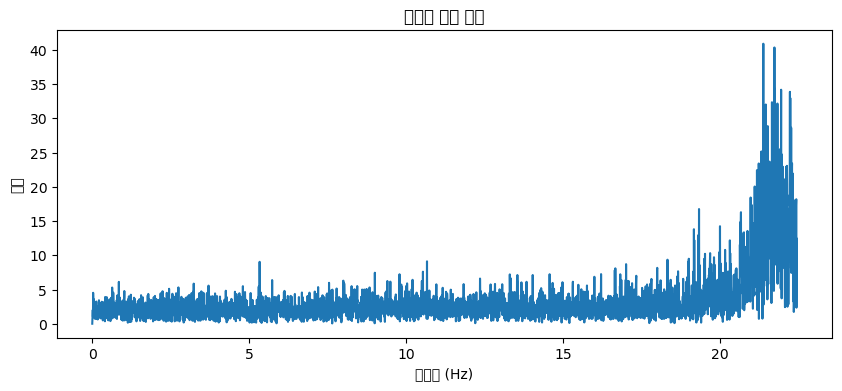

In [2]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# MP3 파일 경로 설정
mp3_file_path = "/Users/dryoon04/Documents/GitHub/schoolproject/Exercise audio image/ISEGYE IDOL-SuperHero.mp3"

# MP3 파일을 WAV 파일로 변환 (MP3 파일을 직접 처리하기 위해 pydub 라이브러리 사용 가능)
from pydub import AudioSegment
audio = AudioSegment.from_mp3(mp3_file_path)
audio.export("output.wav", format="wav")

# WAV 파일 읽기
sample_rate, audio_data = wavfile.read("output.wav")

# 스테레오 오디오의 경우 왼쪽 채널만 선택
if len(audio_data.shape) > 1:
    audio_data = audio_data[:, 0]

# 푸리에 변환
n = len(audio_data)  # 신호의 길이
k = np.arange(n)
T = n / sample_rate  # 주파수 샘플링 간격
frq = k / T  # 주파수 범위 (0부터 sample_rate까지)

Y = np.fft.fft(audio_data) / n  # 푸리에 변환 및 정규화
Y = Y[:n // 2]  # 절반까지만 선택 (대칭성 때문)

# 결과를 시각화
plt.figure(figsize=(10, 4))
plt.plot(frq[:4000], np.abs(Y[:4000]))  # 주파수 범위를 제한하여 플롯
plt.xlabel('(Hz)')
plt.ylabel('wave size')
plt.title('result')
plt.show()
